In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

In [2]:
# number of vectors sent
K = 5
# number of replications
nrep = 100
# number of training iterations
niter = np.array(range(K + 1))
# variable names
listSting = list(map(str, list(range(1,(K+2)))))

In [3]:
sig = 0.1
n = 100
alpha = 1
Xdist = "uniform"
settingNum = 1
data_tmp = pd.read_csv("data/EnetTrainingAssistedMSE__betasetting_" + str(settingNum) +  "n_" + str(n) +"_sig_" + str(sig) + "_Xdist_" + Xdist + "_alpha_" + str(alpha) + ".csv", header = 0)  
ll_array = -data_tmp[['V' + s  for s in listSting]]

0
1
0
1


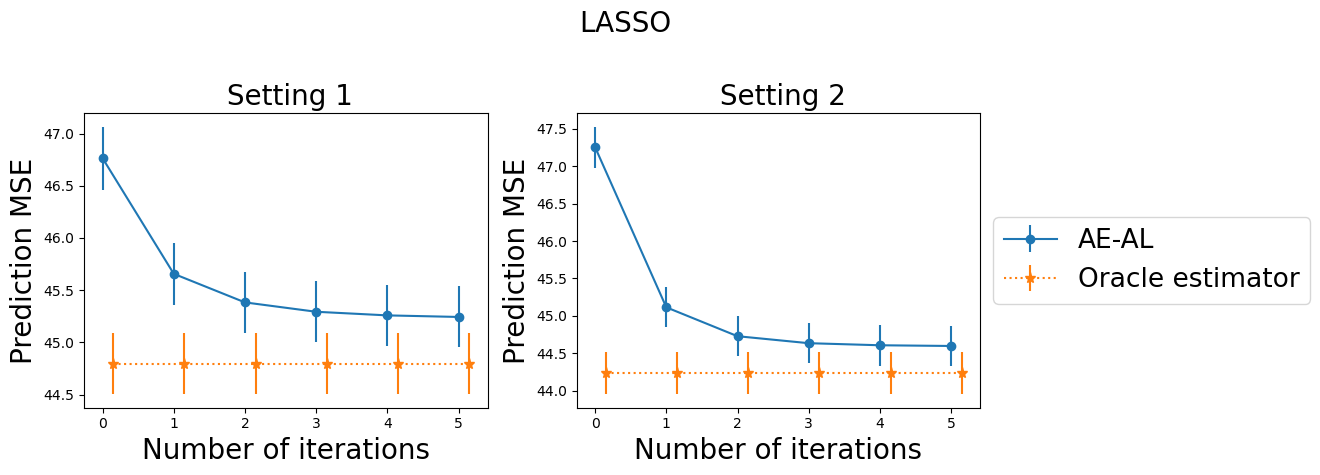

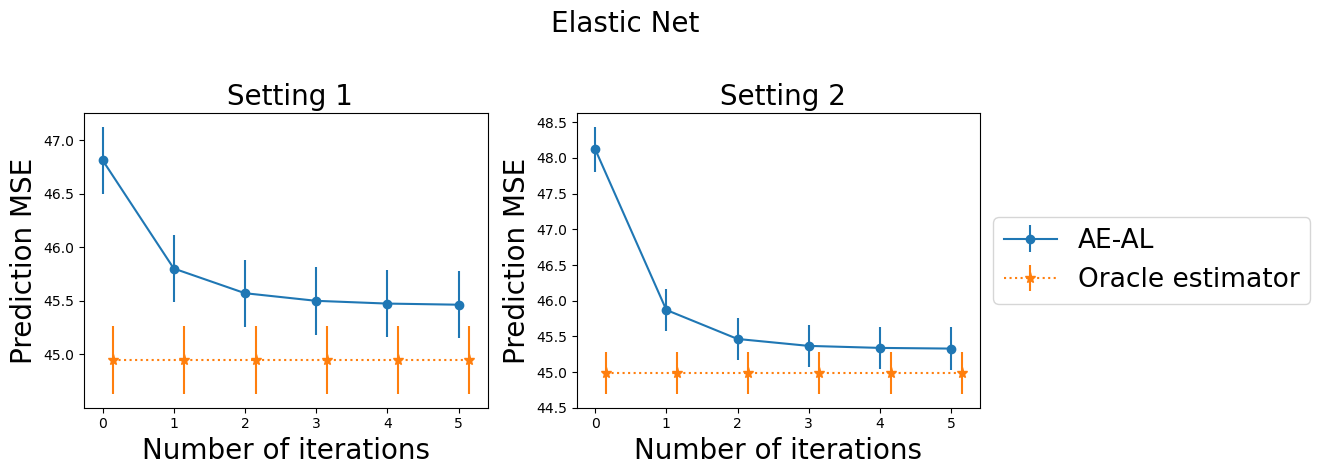

In [4]:
sig = 0.1
n = 100
alpha = 1
Xdist = "uniform"


for alpha in [1, 0.5]:
    fit, axes = plt.subplots(1,2, figsize = (9, 8))
    fit.set_size_inches(14, 5)  

    if alpha == 1:
        figName = "LASSO"
    else:
        figName = "Elastic Net"
    fit.suptitle(figName, fontsize=20)  


    fname = "EnetTrainingAssistedMSE__betasetting_" + str(settingNum) +  "n_" + str(n) +"_sig_" + str(sig) + "_Xdist_" + Xdist + "_alpha_" + str(alpha) 


    for i in range(0,2):
        print(i)
        settingNum = i + 1

        axe = axes[i]
        # assisted learning ll
        data_tmp = pd.read_csv("data/EnetTrainingAssistedMSE__betasetting_" + str(settingNum) +  "n_" + str(n) +"_sig_" + str(sig) + "_Xdist_" + Xdist + "_alpha_" + str(alpha) + ".csv", header = 0)  
        ll_array = -data_tmp[['V' + s  for s in listSting]]
        # oracle ll
        data_tmp = pd.read_csv("data/EnetTrainingOracleMSE__betasetting_" + str(settingNum) +  "n_" + str(n) +"_sig_" + str(sig) + "_Xdist_" + Xdist + "_alpha_" + str(alpha) + ".csv", header = 0)  
        data_tmp = -data_tmp['x']
        # import the rejection result
        ll_oracle_array = data_tmp

        ll_mean1 = np.mean(ll_array, axis = 0)
        ll_ste1 = np.std(ll_array, axis = 0)/math.sqrt(nrep)


        ll_oracle_mean = np.repeat(np.mean(ll_oracle_array), (K+1) )
        ll_oracle_ste = np.repeat(np.std(ll_oracle_array), (K+1) )/math.sqrt(nrep)
        
        axe.errorbar((niter), -ll_mean1 , ll_ste1, marker = 'o')
        axe.errorbar((niter + 0.15), -ll_oracle_mean , ll_oracle_ste, marker = "*", linestyle = 'dotted', markersize=8)
        axe.set_xlabel("Number of iterations", fontsize=20)
        axe.set_ylabel("Prediction MSE", fontsize=20)
        axe.set_title(' Setting ' + str(settingNum), fontsize=20)
        # axe.set_ylim(-7.8,-0.5)
        
        if i==1:
            axe.legend(['AE-AL', 'Oracle estimator'], prop={'size': 19}, loc='center left', bbox_to_anchor=(1, 0.5))
        elif i<1:
            axe.legend('',frameon=False)
    plt.tight_layout(rect=[0.05, 0.04, 1, 0.95])
    #===========================create folder to store output results=====================
    results_path_data = "./Result_Figure"
    # Check whether the specified path exists or not
    isExist = os.path.exists(results_path_data)

    if not isExist:
        # Create a new directory because it does not exist
        os.makedirs(results_path_data)

    fgname = "EnetTrainingMSE__betasetting_" + str(settingNum) +  "_n_" + str(n)  + "_Xdist_" + Xdist + "_" + figName 
    # set the title
    # plt.title('Grouped boxplot using matplotlib')
    
    plt.savefig('Result_Figure/' + fgname + '.pdf')